# GPR

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor                 
from sklearn.gaussian_process.kernels import RBF,RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared,Matern
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import (RationalQuadratic,Exponentiation)
from sklearn.gaussian_process.kernels import CompoundKernel
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

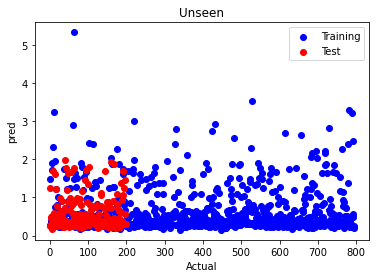

In [8]:

Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib1']
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y, color="b",label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test, color="r",label="Test")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

In [15]:
state=33

In [16]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib1']

In [17]:
y.describe()

count    995.000000
mean       0.638849
std        0.562940
min        0.148310
25%        0.292847
50%        0.403139
75%        0.732802
max        5.338700
Name: rib1, dtype: float64

In [18]:
modo=GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1) ** 2 + WhiteKernel(noise_level=0.5),
                         n_restarts_optimizer=4, normalize_y=True,
                         random_state=0)

mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)

In [19]:
cv = KFold(n_splits=10, random_state=1)

In [9]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=state)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])

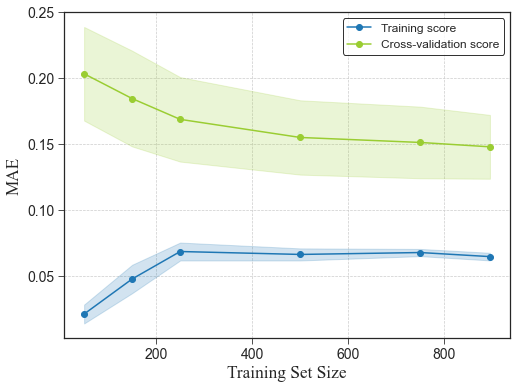

In [10]:
# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
# csfont = {'fontname':'Times New Roman'}    
# plt.figure(figsize=(10, 6))
# plt.style.use('seaborn-whitegrid')
# # plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color='forestgreen',label="Training score",markeredgecolor='forestgreen')
# plt.plot(train_size, test_mean, 'o-', color='steelblue',label="Cross-validation score",markeredgecolor='steelblue')
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='forestgreen',alpha=0.1)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='steelblue', alpha=0.1)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]),**csfont)
# plt.xlabel("Training Set Size",**csfont)
# plt.ylabel("RMS Error",**csfont)
# plt.rcParams["font.family"] = "Times New Roman"
# plt.legend(loc="best")
# plt.show()

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.plot(train_size,train_mean, 'o-', color="C0",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="yellowgreen",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color="C0", alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color="yellowgreen", alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('rib1_LCgpr', bbox_inches="tight")
plt.show()

In [11]:
pd.DataFrame(test_mean)

,0
0,0.203444
1,0.184675
2,0.168925
3,0.155211
4,0.151430
5,0.148115


In [20]:
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=state)

In [21]:
X = X.to_numpy()
y = y.to_numpy()

In [22]:
y_Test=y_Test.to_numpy()

In [23]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

Root Mean squared error: 0.515446

Root Mean squared error: 0.218880

Root Mean squared error: 0.329370

Root Mean squared error: 0.267359

Root Mean squared error: 0.287549

Root Mean squared error: 0.300137

Root Mean squared error: 0.382544

Root Mean squared error: 0.187456

Root Mean squared error: 0.270772

Root Mean squared error: 0.367236



In [24]:
ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.410531
dtype: float64  error mean --->0    0.107952
Name: mean, dtype: float64  error std --->0    0.152269
Name: std, dtype: float64


# train score

In [25]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.937347
dtype: float64  error mean --->0    0.078553
Name: mean, dtype: float64  error std --->0    0.152185
Name: std, dtype: float64


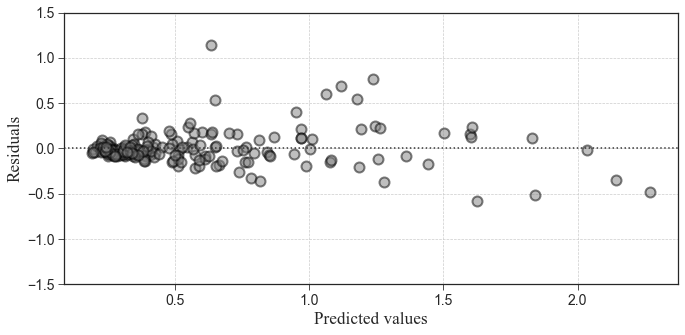

In [28]:
plt.figure(figsize=(11, 5))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
# a=sns.residplot(y=abs(y), x=abs(ytr),label='Train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='Test',scatter_kws={"s": 100,"facecolor": 'grey',"linewidth":2,"edgecolors": 'k',"alpha":0.5})
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

# leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
# leg.get_frame().set_linewidth(1)
# leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([15,80])
plt.ylim([-1.5,1.5])
plt.savefig('rib1_res', bbox_inches="tight")
plt.show()

In [27]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.025277
std,0.169408
min,-0.780670
25%,-0.029224
50%,-0.001656
75%,0.035142
max,1.456963


In [28]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,0.010638
std,0.186507
min,-0.632774
25%,-0.053718
50%,-0.002149
75%,0.057926
max,1.151114


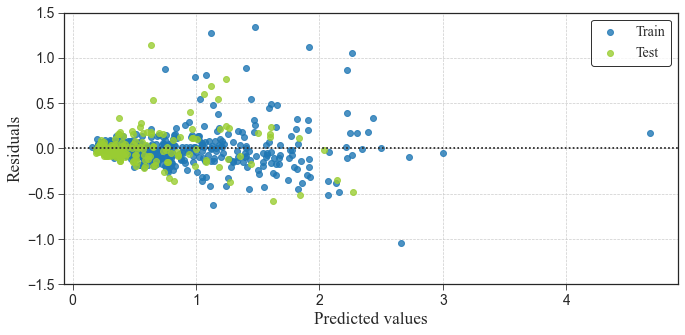

In [48]:
plt.figure(figsize=(11, 5))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=(y), x=(ytr),label='Train',color='C0')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='Test',color='yellowgreen')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([15,820])
plt.ylim([-1.5,1.5])
plt.savefig('headacc_res', bbox_inches="tight")
plt.show()

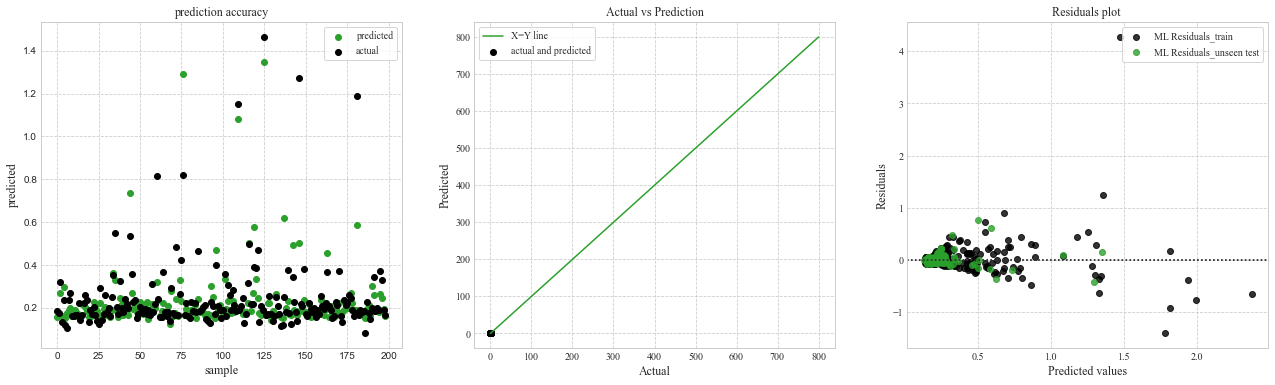

In [12]:
plt.figure(figsize=(22, 6))
plt.style.use('seaborn-whitegrid')
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,color='C2',label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual',color='k')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted',color='k')
plt.plot([0,800],[0,800],color='C2',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train',color='k')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test',color='C2')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)


plt.show()